In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from matplotlib import rcParams

%matplotlib inline

In [2]:
boston = load_boston()
print(boston.data.shape) #shape of dataset

(506, 13)


In [3]:
print(boston.keys()) #available dictionary keys

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.feature_names) #columms

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
print(boston.target.shape)

(506,)


In [9]:
bos['PRICE'] = boston.target
print(bos.head()) #dataframe with price column

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [10]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

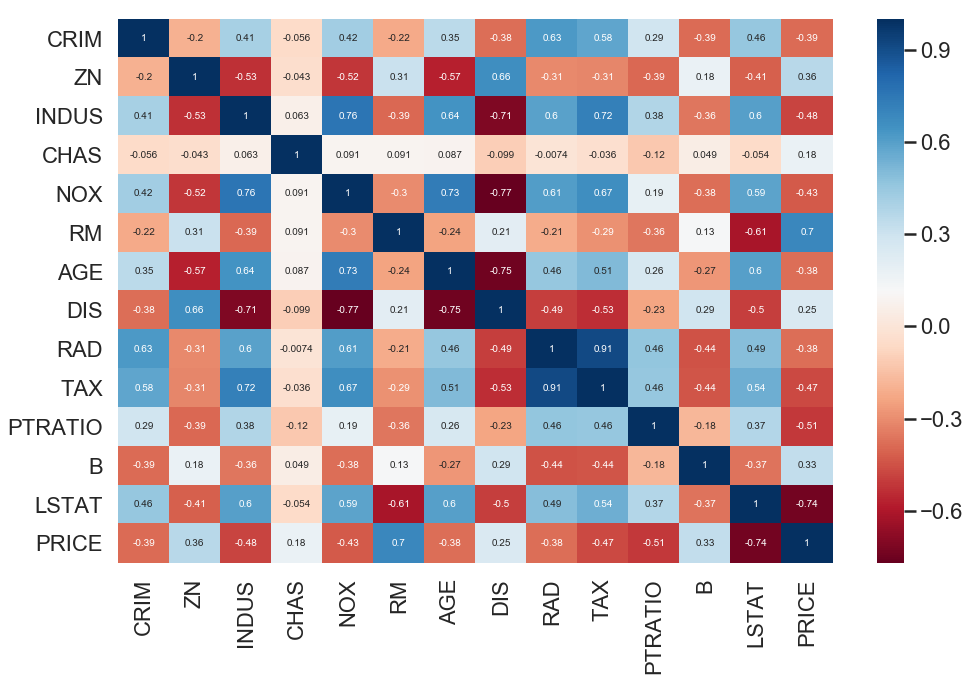

In [12]:
#strong positive correlations are blue
#strong negative correlations are red

ax, fig = plt.subplots(figsize = (16,10))
sns.heatmap(bos.corr(), annot=True, cmap = 'RdBu') 
plt.show()

[]

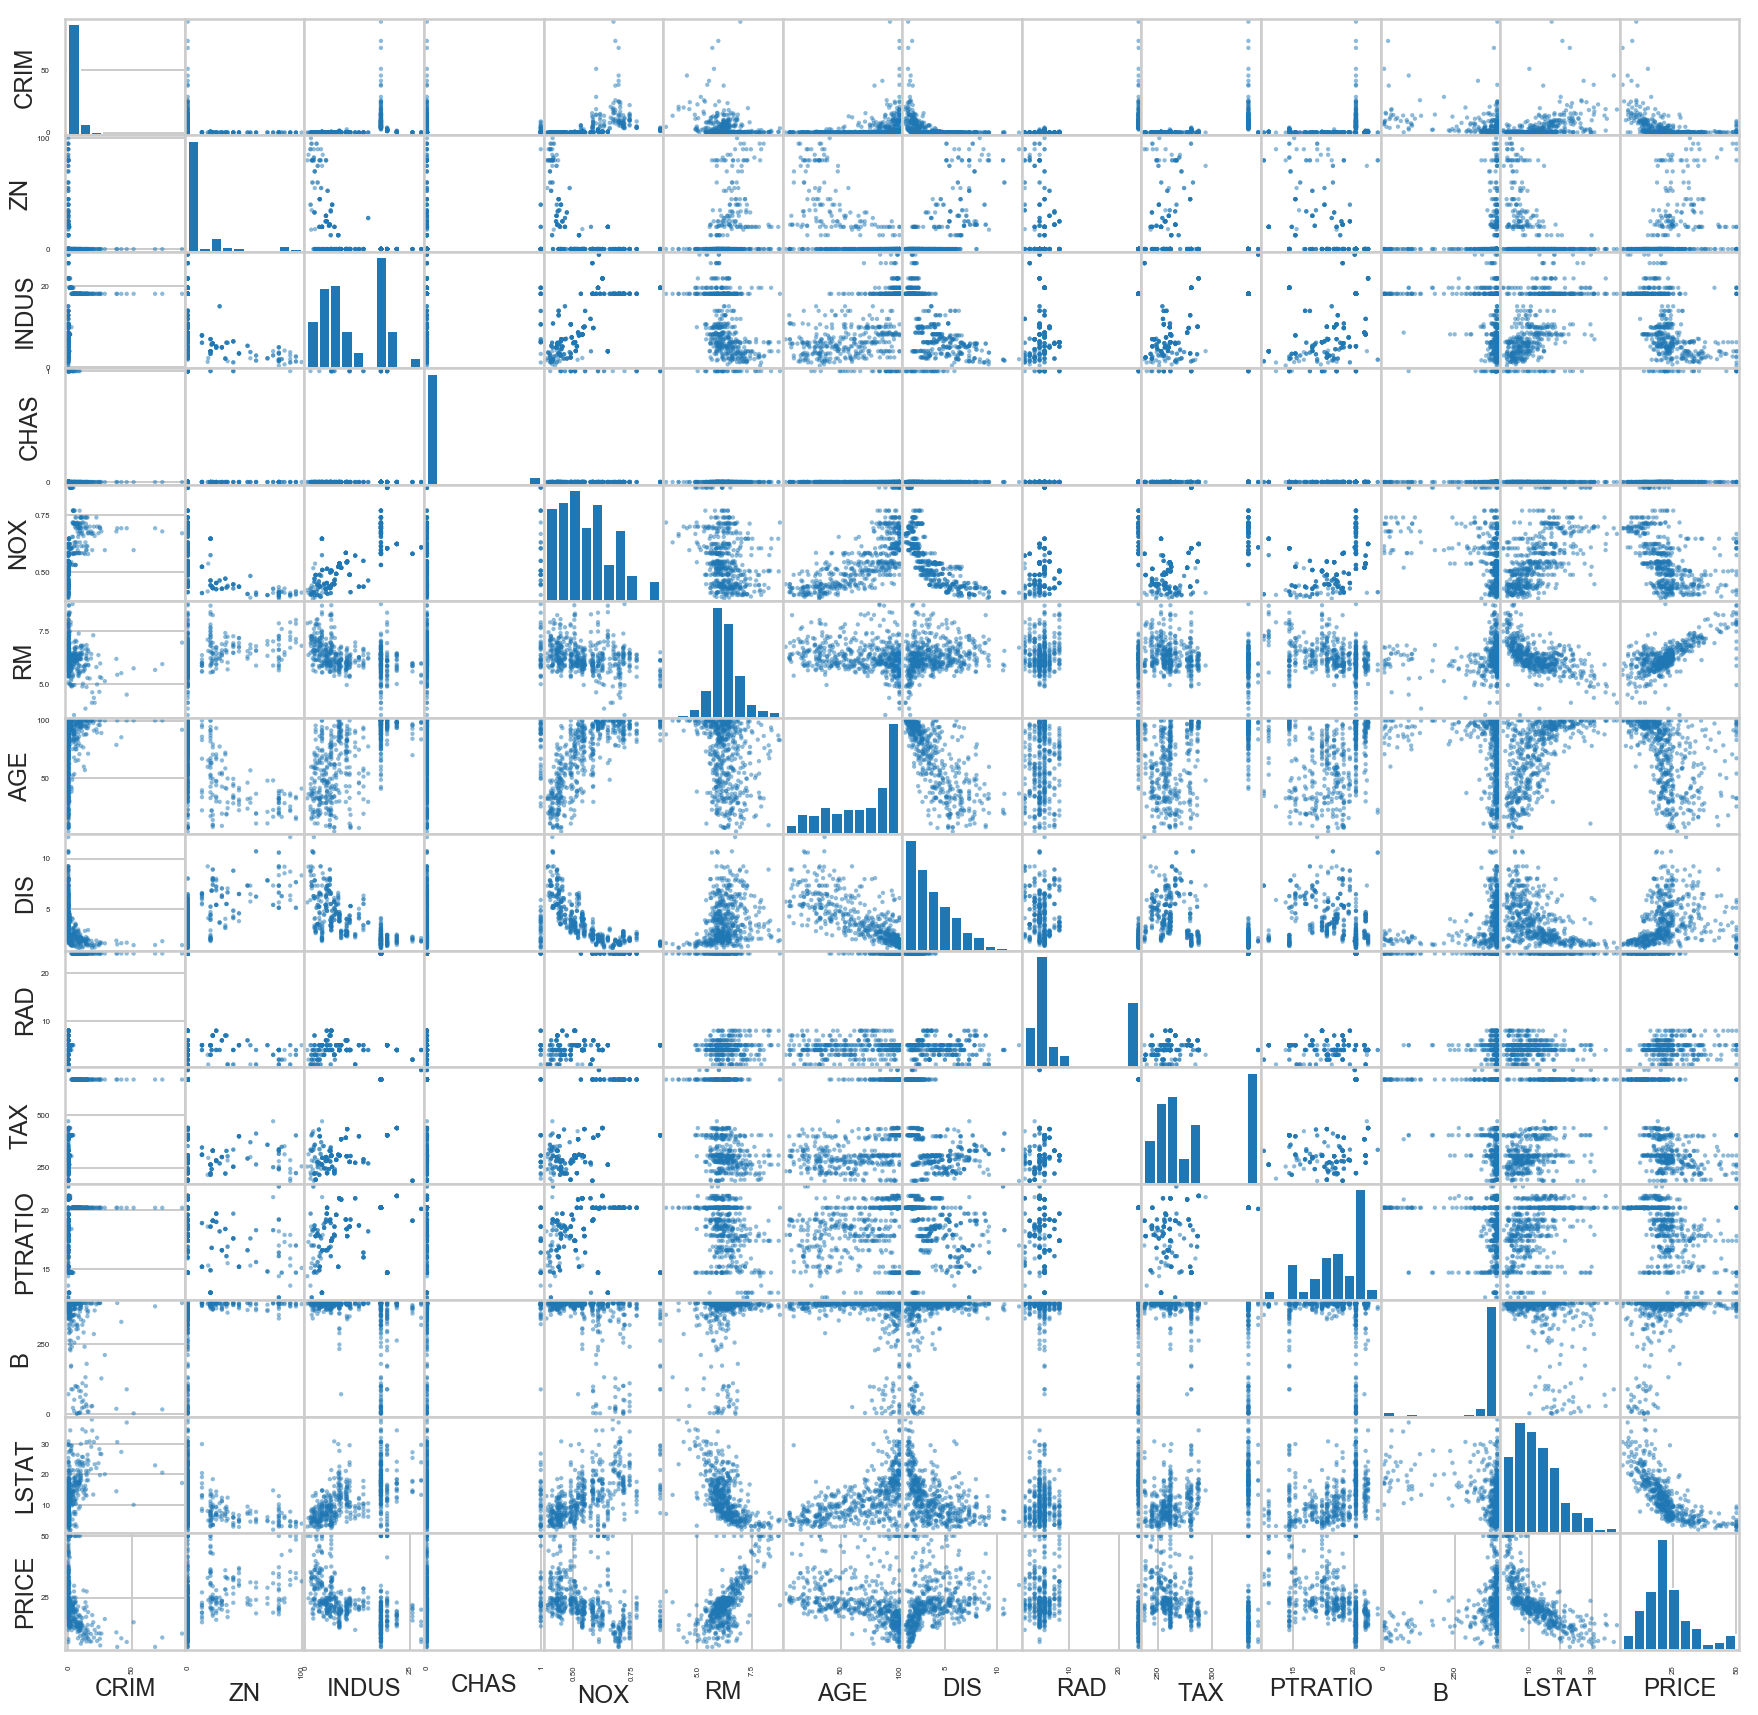

In [22]:
f = plt.Figure(figsize = (8,6))
pd.plotting.scatter_matrix(bos[bos.columns], figsize = (30,30), s = 75)
plt.plot()

In [23]:
#normal equation will compute the correct weights and bias in a closed form solution

def normal_equation(x,y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T),y)

In [33]:
features = ['LSTAT', 'RM']
X_b = np.c_[np.ones((len(bos[features]),1)), bos[features].values] #X matrix
X_b.shape

(506, 3)

In [37]:
from sklearn.model_selection import train_test_split

#splitting dataset to train-test
# Y = Boston Housing Price
# X = All other features

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 3)
(167, 3)
(339,)
(167,)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.5, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(253, 3)
(253, 3)
(253,)
(253,)


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.10, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 3)
(51, 3)
(455,)
(51,)


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.05, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(480, 3)
(26, 3)
(480,)
(26,)


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_b, Y, test_size = 0.01, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(500, 3)
(6, 3)
(500,)
(6,)


In [47]:
theta = normal_equation(X_train, Y_train)
theta

array([-1.16521836, -0.65555214,  5.08697274])

In [48]:
predictions = np.dot(X_train, theta)

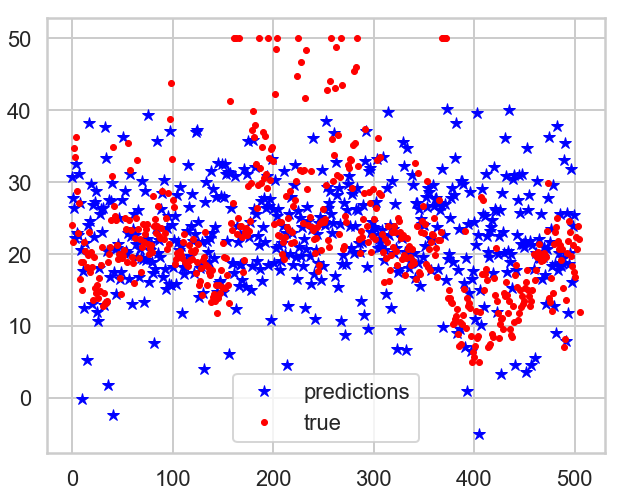

In [50]:
ax, fig = plt.subplots(figsize = (10,8))
plt.plot(predictions, 'b.', marker = '*')
plt.plot(Y_train, 'r.')
plt.legend(['predictions', 'true'])
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
mse_train = sklearn.metrics.mean_squared_error(predictions, Y_train)
print(mse_train)

30.522241053059094


In [58]:
test_pred = np.dot(X_test, theta)

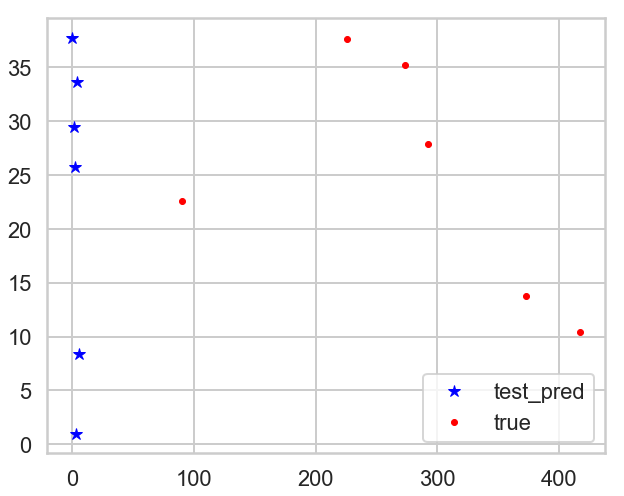

In [61]:
ax, fig = plt.subplots(figsize = (10,8))
plt.plot(test_pred, 'b.', marker = '*')
plt.plot(Y_test, 'r.')
plt.legend(['test_pred', 'true'])
plt.show()

In [62]:
mse_test = sklearn.metrics.mean_squared_error(test_pred, Y_test)
print(mse_test)

30.43896664293625


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

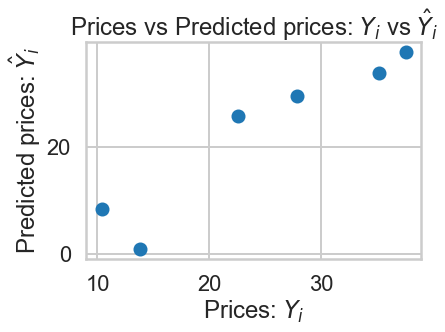

In [52]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [53]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

30.438966642936247
